# Requirements

In [1]:
from cProfile import label

# Add as many imports as you need.
import pandas as pd 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from random import seed
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/vacation_preferences_data.csv')

In [3]:
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,female,85325,master,3,hiking,1762,suburban,51.0,262,fall,1,0,1
52440,37.0,female,110346,bachelor,7,swimming,1676,urban,259.0,84,spring,1,0,0
52441,53.0,non-binary,71080,doctorate,7,swimming,3877,urban,NaN,27,fall,0,1,0
52442,40.0,female,75174,doctorate,9,swimming,4620,suburban,173.0,10,summer,0,1,0


Preprocess the input and the output variables appropriately.

In [4]:
# Write your code here. Add as many boxes as you need.


Explore the dataset using visualizations of your choice.

<Figure size 1000x1200 with 0 Axes>

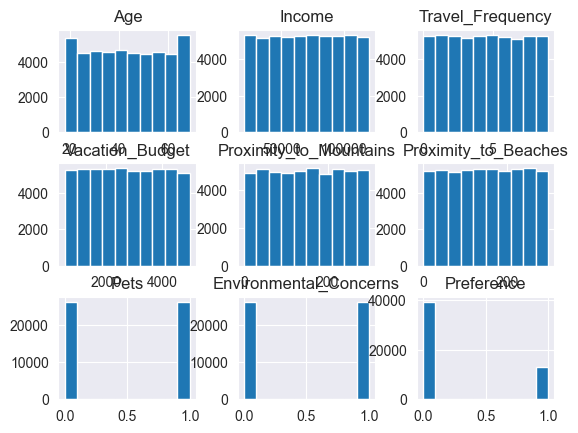

In [5]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(10,12))
df.hist()
plt.show()

Check if the dataset is balanced.

In [6]:
# Write your code here. Add as many boxes as you need.
df['Preference'].value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [7]:
# Write your code here. Add as many boxes as you need.
missing_values_percentage = df.isnull().sum() / len(df)
missing_values_percentage * 100

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Preferred_Activities      0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

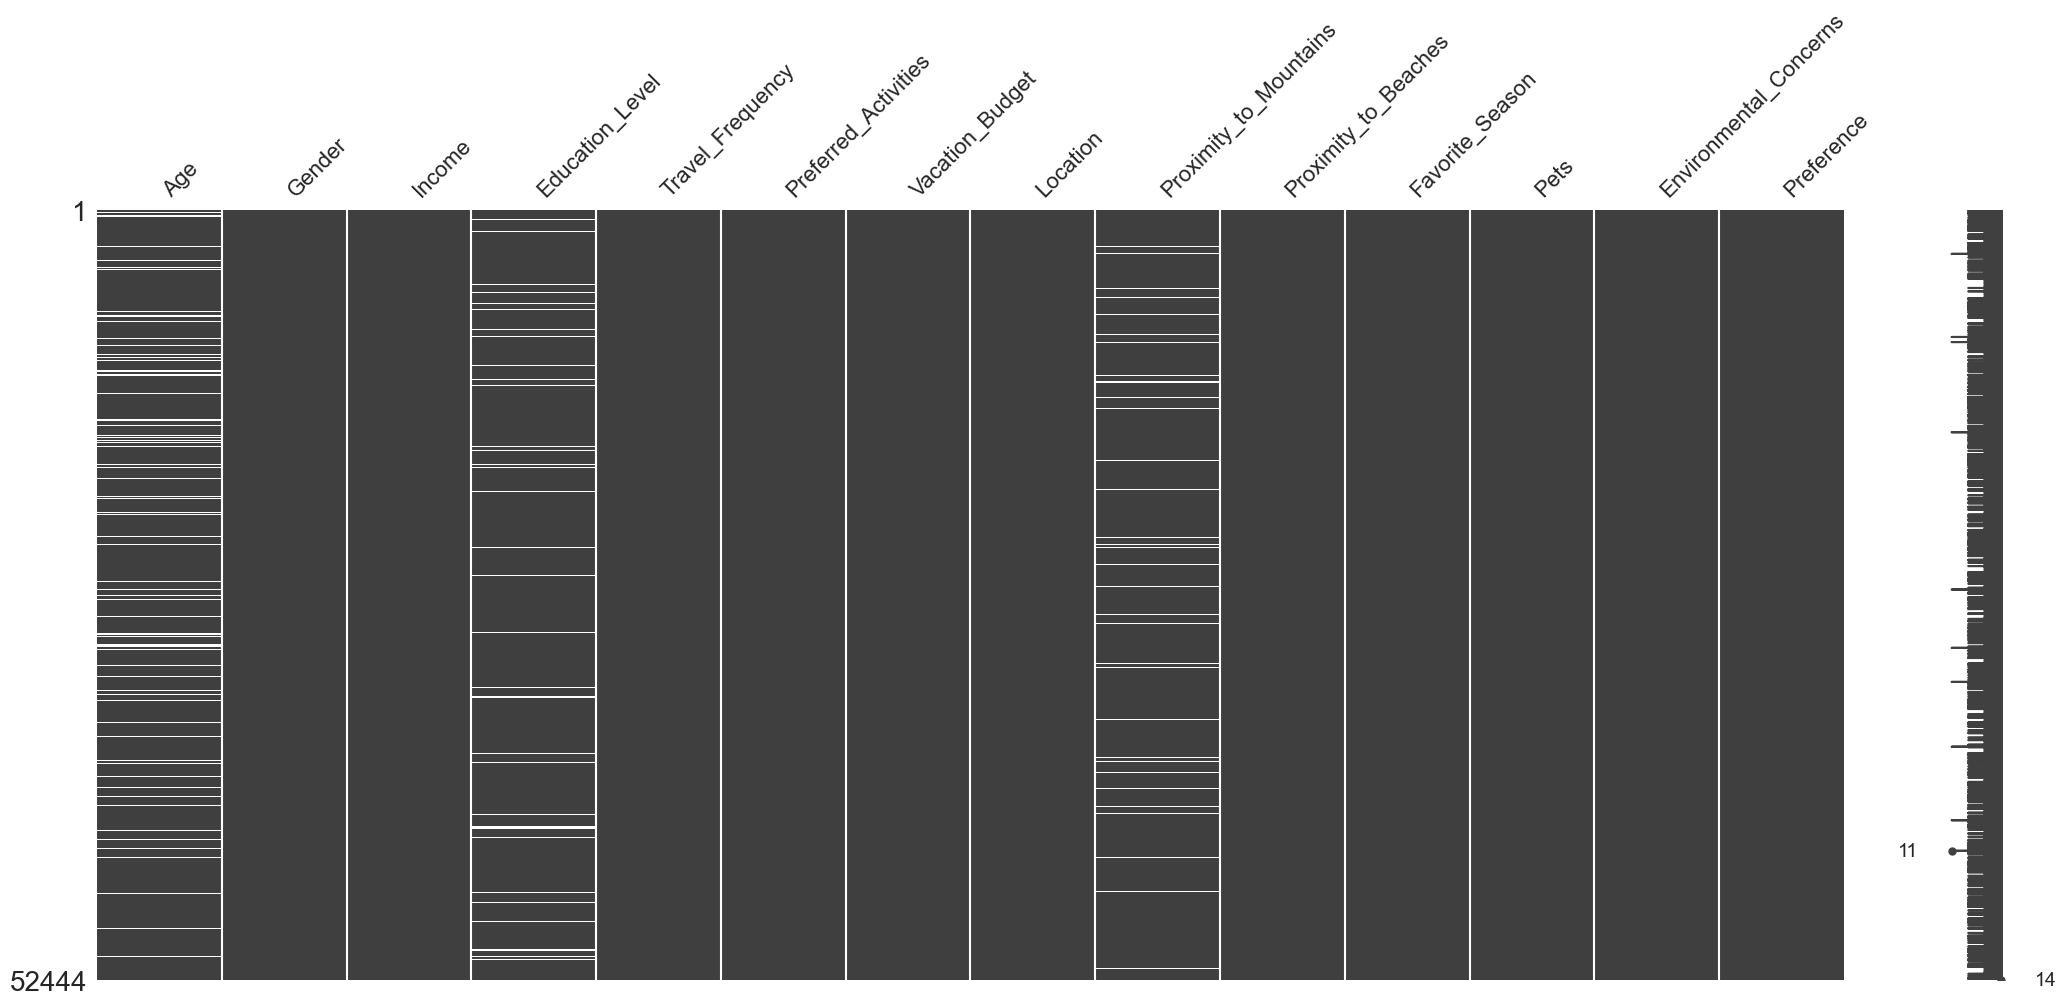

In [8]:
# Write your code here. Add as many boxes as you need.
msno.matrix(df)

<Axes: >

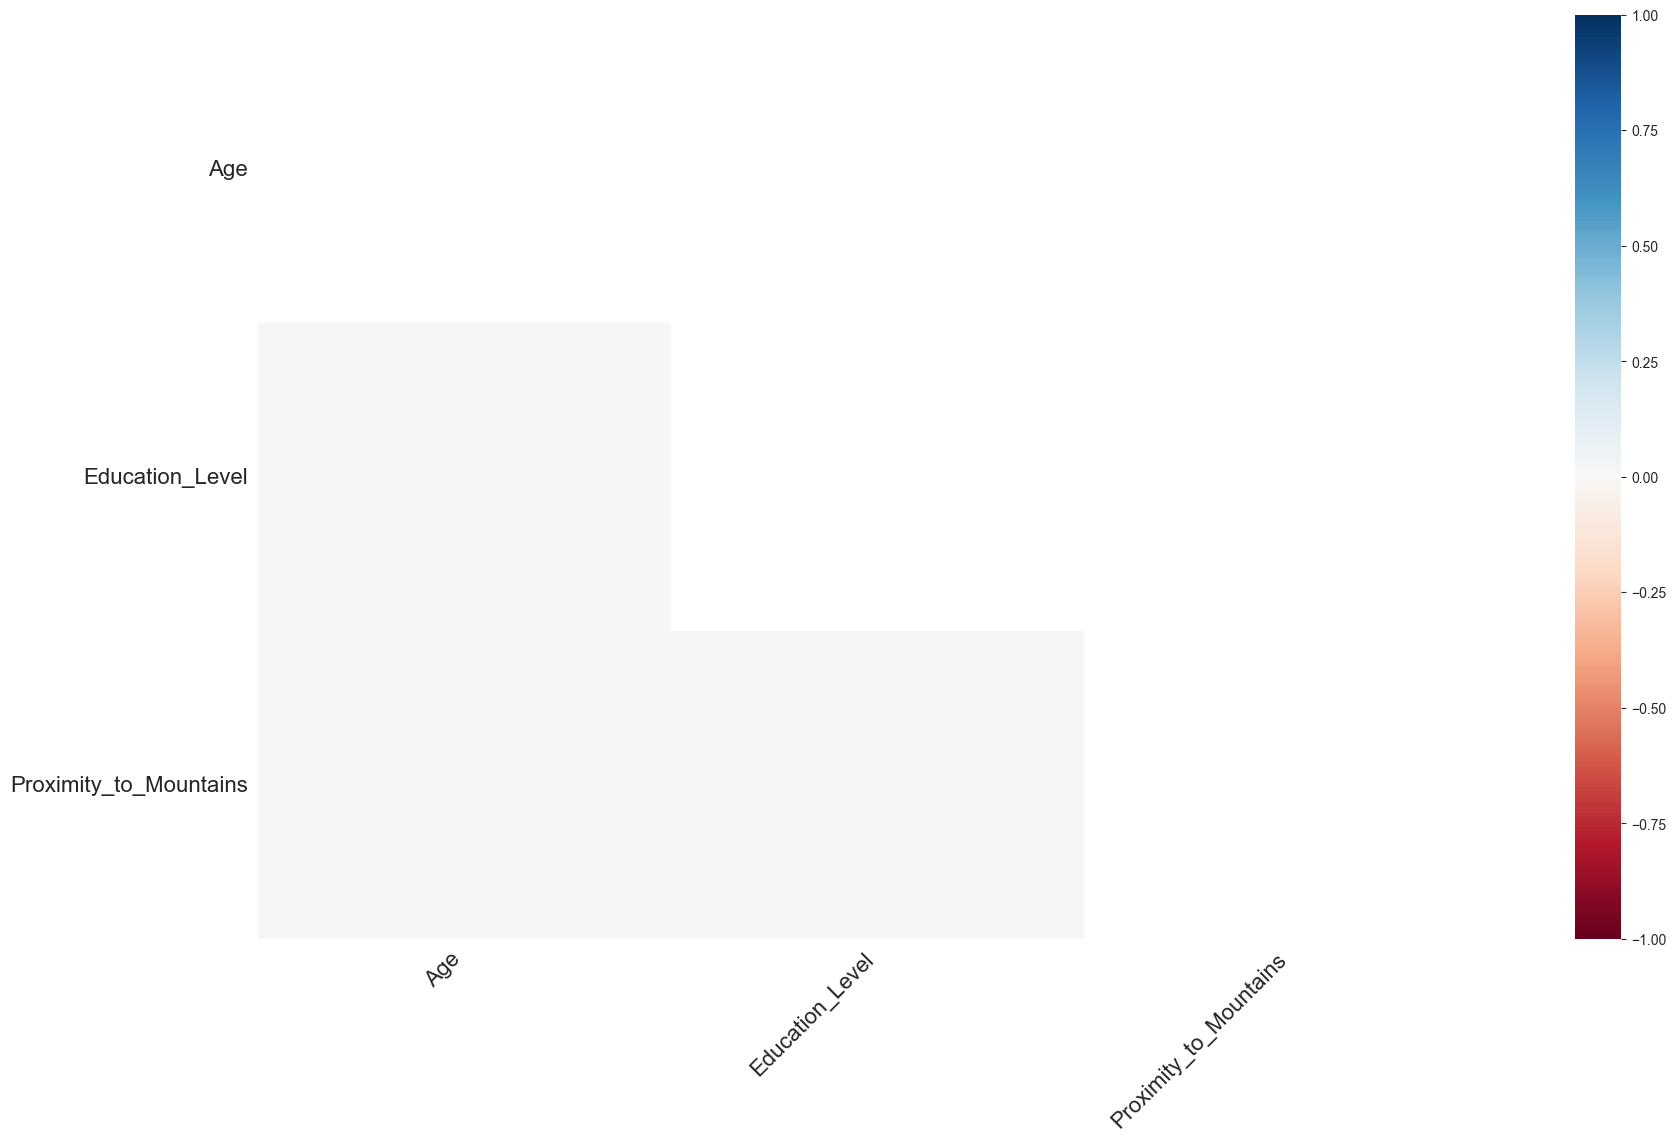

In [9]:
msno.heatmap(df)

In [10]:
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,female,85325,master,3,hiking,1762,suburban,51.0,262,fall,1,0,1
52440,37.0,female,110346,bachelor,7,swimming,1676,urban,259.0,84,spring,1,0,0
52441,53.0,non-binary,71080,doctorate,7,swimming,3877,urban,NaN,27,fall,0,1,0
52442,40.0,female,75174,doctorate,9,swimming,4620,suburban,173.0,10,summer,0,1,0


# Encoding

In [11]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder() #bidejki imame high_School, bachelor, doctorate - po broj ama gi dava kako decimali 1.0, 2.0...

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Preferred_Activities'] = label_encoder.fit_transform(df['Preferred_Activities'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Favorite_Season'] = label_encoder.fit_transform(df['Favorite_Season'])
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])

In [12]:
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0,9,1,2477,2,175.0,267,2,0,1,1
1,69.0,1,88740,3,1,3,4777,1,NaN,190,0,0,1,0
2,46.0,0,46562,3,0,1,1469,2,71.0,280,3,0,0,1
3,32.0,2,99044,2,6,0,1482,0,31.0,255,2,1,0,1
4,60.0,0,106583,2,5,2,516,1,23.0,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0,85325,3,3,0,1762,1,51.0,262,0,1,0,1
52440,37.0,0,110346,0,7,3,1676,2,259.0,84,1,1,0,0
52441,53.0,2,71080,1,7,3,3877,2,NaN,27,0,0,1,0
52442,40.0,0,75174,1,9,3,4620,1,173.0,10,2,0,1,0


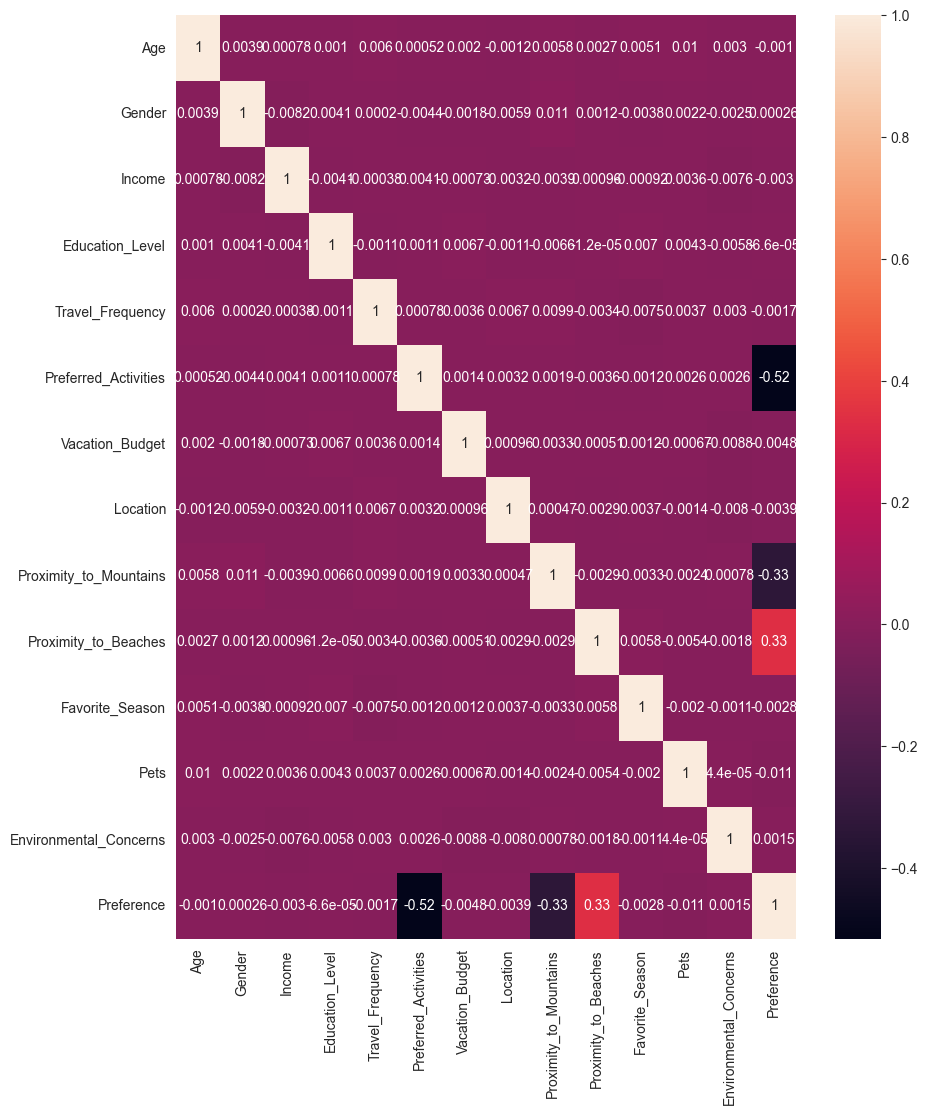

In [13]:
correlation_features = df.corr()

plt.figure(figsize=(10,12))
sns.heatmap(correlation_features, annot=True)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [14]:
missing_values_percentage * 100

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Preferred_Activities      0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
dtype: float64

In [15]:
df['Education_Level'].unique()

array([0, 3, 2, 1, 4])

# BORIS RESENIE 1 

 Ako treba da koristis KNN imputer, NE koristi StandardScaler, KORISTI MinMax


In [16]:
# Write your code here. Add as many boxes as you need.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Education_Level', 'Proximity_to_Mountains']])

knn_imputer  = KNNImputer(n_neighbors=5)
knn_imputed_data = knn_imputer.fit_transform(scaled_data)

# MOE RESENIE 2 

In [17]:
imputer = SimpleImputer(strategy='mean')

df['Age'] = imputer.fit_transform(df[['Age']]) # ili 2ra opcija da se dropnat site koloni od Age 
df['Education_Level'] = imputer.fit_transform(df[['Education_Level']])
df['Proximity_to_Mountains'] = imputer.fit_transform(df[['Proximity_to_Mountains']])

In [18]:
df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [19]:
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0.0,9,1,2477,2,175.000000,267,2,0,1,1
1,69.0,1,88740,3.0,1,3,4777,1,149.875878,190,0,0,1,0
2,46.0,0,46562,3.0,0,1,1469,2,71.000000,280,3,0,0,1
3,32.0,2,99044,2.0,6,0,1482,0,31.000000,255,2,1,0,1
4,60.0,0,106583,2.0,5,2,516,1,23.000000,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0,85325,3.0,3,0,1762,1,51.000000,262,0,1,0,1
52440,37.0,0,110346,0.0,7,3,1676,2,259.000000,84,1,1,0,0
52441,53.0,2,71080,1.0,7,3,3877,2,149.875878,27,0,0,1,0
52442,40.0,0,75174,1.0,9,3,4620,1,173.000000,10,2,0,1,0


In [20]:
df['Preference'].unique()

array([1, 0])

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [21]:
x = df.drop(columns='Preference')
y = df['Preference']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [23]:
# Write your code here. Add as many boxes as you need.
standard_scaler = StandardScaler()

x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

## Model Selection

Choose and train an approriate model for the given task.

In [24]:
# Write your code here. Add as many boxes as you need.
model = RandomForestClassifier()

model.fit(x_train_scaled, y_train)

RandomForestClassifier()

Use the trained model to make predictions for the test set.

In [25]:
y_predict = model.predict(x_test_scaled)

Assess the performance of the model by using different classification metrics.

In [26]:
# Write your code here. Add as many boxes as you need.
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[7869   44]
 [  65 2511]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7913
           1       0.98      0.97      0.98      2576

    accuracy                           0.99     10489
   macro avg       0.99      0.98      0.99     10489
weighted avg       0.99      0.99      0.99     10489



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [27]:
# Write your code here. Add as many boxes as you need.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [28]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()

x_train_2_scaled = scaler.fit_transform(x_train)
x_test_2_scaled = scaler.transform(x_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [29]:
parameters_grid = {
    'n_estimators' : [100,200,300],
    'max_depth' : [3, 5],
}

model = RandomForestClassifier()

grid_search = GridSearchCV(model, parameters_grid, cv=5)

grid_search.fit(x_train_2_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 200, 300]})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [30]:
# Write your code here. Add as many boxes as you need.
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test_2_scaled)

print(grid_search.best_score_)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9461218892585934
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3927
           1       0.98      0.81      0.89      1318

    accuracy                           0.95      5245
   macro avg       0.96      0.90      0.93      5245
weighted avg       0.95      0.95      0.95      5245

[[3905   22]
 [ 250 1068]]
